In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.classification import *
from pycaret.datasets import get_data
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
mpl.rcParams['figure.dpi'] = 300
import sys
import warnings
import os

In [2]:
data = pd.read_csv("FinalData.csv") 

In [3]:
data

,GenderID,Age,LastEduID,MET_Final,WaistCircumference,HipCircumference,WristCircumference,BMI,HasJob_new,Employmentstatus,...,HasChronicLungDisease,HasHepatitisC,HasHepatitisB,HasFattyLiver,HasRenalFailure,HasStroke,HasMI,HasCardiacDisease,HasHypertension,HasDiabetes
0,2,44,3,34.899995,116.0,120.0,19.0,36.652780,1,1,...,0,0,0,1,0,0,0,0,0,0
1,1,52,1,48.075000,99.0,105.0,18.0,28.256990,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,70,2,39.416654,89.0,94.0,16.0,20.973709,2,99999,...,0,0,0,0,0,0,0,1,0,0
3,2,70,8,51.175000,96.0,106.0,17.0,30.081371,0,999,...,0,0,0,0,0,1,0,0,1,0
4,2,47,1,34.841659,90.0,97.0,17.5,25.815689,3,99,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,2,58,8,40.991661,115.0,112.0,19.0,34.105851,3,99,...,0,0,0,0,0,0,0,0,1,0
3199,2,50,8,37.108330,94.0,99.0,16.0,24.878345,3,99,...,0,0,0,0,0,0,0,0,0,0
3200,2,65,8,39.700000,93.0,99.0,16.0,24.609734,3,99,...,0,0,0,0,0,1,0,0,1,0
3201,1,42,1,40.449995,97.0,96.0,18.0,23.999459,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,GenderID,Age,LastEduID,MET_Final,WaistCircumference,HipCircumference,WristCircumference,BMI,HasJob_new,Employmentstatus,...,HasChronicLungDisease,HasHepatitisC,HasHepatitisB,HasFattyLiver,HasRenalFailure,HasStroke,HasMI,HasCardiacDisease,HasHypertension,HasDiabetes
count,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,...,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000
mean,1.568530,50.290665,4.001561,40.135049,97.835529,101.150328,17.953793,27.809414,1.960037,6523.606931,...,0.029035,0.000312,0.000312,0.215111,0.018108,0.019357,0.026225,0.091477,0.242897,0.125507
std,0.495359,9.702193,2.669664,5.490491,19.438126,9.208158,1.667830,5.039845,1.033010,24398.873936,...,0.167932,0.017669,0.017669,0.410963,0.133363,0.137797,0.159830,0.288331,0.428900,0.331345
min,1.000000,35.000000,1.000000,23.599995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,42.000000,2.000000,36.774998,90.000000,95.000000,17.000000,24.430611,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,50.000000,3.000000,39.308323,97.000000,100.000000,18.000000,27.428571,2.000000,99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,58.000000,8.000000,42.527078,105.000000,106.000000,19.000000,30.676944,3.000000,99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,70.000000,8.000000,80.549996,958.000000,146.000000,29.000000,54.862351,3.000000,99999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data['HasDiabetes'].value_counts()

0    2801
1     402
Name: HasDiabetes, dtype: int64

In [6]:
round(data.HasDiabetes.value_counts()*100/len(data),2)

0    87.45
1    12.55
Name: HasDiabetes, dtype: float64

In [7]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 111 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    GenderID                  int64  
 1    Age                       int64  
 2    LastEduID                 int64  
 3    MET_Final                 float64
 4    WaistCircumference        float64
 5    HipCircumference          float64
 6    WristCircumference        float64
 7    BMI                       float64
 8    HasJob_new                int64  
 9    Employmentstatus          int64  
 10   SleepDuration24h1         float64
 11   SleepDurationMidDay1      float64
 12   TV1                       float64
 13   AtDeskWork1               float64
 14   Computer1                 float64
 15   Eating1                   float64
 16   Cooking1                  float64
 17   Driving1                  float64
 18   Walking1                  float64
 19   AerobicExercise1          float64
 20   Drivin

In [8]:
round(data.isnull().sum().sort_values(ascending=False)*100/len(data),2)

Pizza               0.03
GenderID            0.00
Wholegrain          0.00
HasOvarianCancer    0.00
HasLupus            0.00
                    ... 
SGPT                0.00
SGOT                0.00
CHOL                0.00
TG                  0.00
HasDiabetes         0.00
Length: 111, dtype: float64

In [9]:
data.nunique()

GenderID                 2
Age                     36
LastEduID                8
MET_Final             2953
WaistCircumference     167
                      ... 
HasStroke                2
HasMI                    2
HasCardiacDisease        2
HasHypertension          2
HasDiabetes              2
Length: 111, dtype: int64

In [10]:
data.shape

(3203, 111)

In [11]:
data.columns

Index(['GenderID', 'Age', 'LastEduID', 'MET_Final', 'WaistCircumference',
       'HipCircumference', 'WristCircumference', 'BMI', 'HasJob_new',
       'Employmentstatus',
       ...
       'HasChronicLungDisease', 'HasHepatitisC', 'HasHepatitisB',
       'HasFattyLiver', 'HasRenalFailure', 'HasStroke', 'HasMI',
       'HasCardiacDisease', 'HasHypertension', 'HasDiabetes'],
      dtype='object', length=111)

In [12]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

In [13]:
data

,GenderID,Age,LastEduID,MET_Final,WaistCircumference,HipCircumference,WristCircumference,BMI,HasJob_new,Employmentstatus,...,HasChronicLungDisease,HasHepatitisC,HasHepatitisB,HasFattyLiver,HasRenalFailure,HasStroke,HasMI,HasCardiacDisease,HasHypertension,HasDiabetes
0,2,44,3,34.899995,116.0,120.0,19.0,36.652780,1,1,...,0,0,0,1,0,0,0,0,0,0
1,1,52,1,48.075000,99.0,105.0,18.0,28.256990,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,70,2,39.416654,89.0,94.0,16.0,20.973709,2,99999,...,0,0,0,0,0,0,0,1,0,0
3,2,70,8,51.175000,96.0,106.0,17.0,30.081371,0,999,...,0,0,0,0,0,1,0,0,1,0
4,2,47,1,34.841659,90.0,97.0,17.5,25.815689,3,99,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,2,58,8,40.991661,115.0,112.0,19.0,34.105851,3,99,...,0,0,0,0,0,0,0,0,1,0
3199,2,50,8,37.108330,94.0,99.0,16.0,24.878345,3,99,...,0,0,0,0,0,0,0,0,0,0
3200,2,65,8,39.700000,93.0,99.0,16.0,24.609734,3,99,...,0,0,0,0,0,1,0,0,1,0
3201,1,42,1,40.449995,97.0,96.0,18.0,23.999459,1,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = data.drop(columns='HasDiabetes')
y = data.HasDiabetes
from sklearn.impute import SimpleImputer
freq_imputer = SimpleImputer(strategy='most_frequent')
X_freq_imputed = pd.DataFrame(freq_imputer.fit_transform(X))
X_freq_imputed.columns = X.columns

In [15]:
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.95
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(X_freq_imputed)
X_freq_imputed=X_freq_imputed[X_freq_imputed.columns[sel.get_support(indices=True)]]

In [16]:
print("Before Sampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before Sampling, counts of label '0': {} \n".format(sum(y == 0)))

sm = SMOTE(random_state = 123) 
X_resampled, y_resampled  = sm.fit_resample(X_freq_imputed, y.ravel())
#cc = ClusterCentroids(random_state=123)
#X_resampled, y_resampled  = cc.fit_resample(X_freq_imputed, y.ravel())

#rus = RandomUnderSampler(random_state=123)
#X_resampled, y_resampled  = rus.fit_resample(X_freq_imputed, y)

print('After Sampling, the shape of train_X: {}'.format(X_resampled.shape)) 
print('After Sampling, the shape of train_y: {} \n'.format(y_resampled.shape)) 
  
print("After Sampling, counts of label '1': {}".format(sum(y_resampled == 1))) 
print("After Sampling, counts of label '0': {}".format(sum(y_resampled == 0))) 

Before Sampling, counts of label '1': 402
Before Sampling, counts of label '0': 2801 

After Sampling, the shape of train_X: (5602, 79)
After Sampling, the shape of train_y: (5602,) 

After Sampling, counts of label '1': 2801
After Sampling, counts of label '0': 2801


In [17]:
X_resampled

,GenderID,Age,LastEduID,MET_Final,WaistCircumference,HipCircumference,WristCircumference,BMI,HasJob_new,Employmentstatus,...,VegKeepFreezer,BreadContainerTypeID1,LemonContainerTypeID1,CVD_History,HasDepression,HasKidneyStone,HasThyroidDisease,HasFattyLiver,HasCardiacDisease,HasHypertension
0,2.00000,44.000000,3.000000,34.899995,116.000000,120.000000,19.000000,36.652780,1.0,1.0,...,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
1,1.00000,52.000000,1.000000,48.075000,99.000000,105.000000,18.000000,28.256990,1.0,1.0,...,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,1.00000,70.000000,2.000000,39.416654,89.000000,94.000000,16.000000,20.973709,2.0,99999.0,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
3,2.00000,70.000000,8.000000,51.175000,96.000000,106.000000,17.000000,30.081371,0.0,999.0,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
4,2.00000,47.000000,1.000000,34.841659,90.000000,97.000000,17.500000,25.815689,3.0,99.0,...,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597,2.00000,57.299195,8.000000,47.297372,88.134059,98.354429,17.574799,24.452339,3.0,99.0,...,0.850403,1.000000,3.551208,0.149597,0.149597,0.149597,0.0,1.000000,0.149597,1.000000
5598,1.21185,61.423700,6.940751,39.312065,94.970375,96.211850,17.682225,28.205527,2.0,99999.0,...,0.000000,1.635549,1.635549,1.000000,0.211850,0.000000,0.0,0.000000,1.000000,0.211850
5599,1.37012,57.117109,1.000000,40.425631,106.772530,100.811566,17.370120,29.775992,1.0,1.0,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
5600,2.00000,56.016943,7.983057,50.854472,95.000000,98.053654,18.994352,27.486631,0.0,999.0,...,0.000000,1.011296,3.991528,0.000000,0.997176,0.002824,1.0,0.002824,0.000000,0.002824


In [18]:
df2 = pd.DataFrame(y_resampled, columns=['HasDiabetes'])
df2
#y_resampled=y_resampled.rename(columns = {'0':'HasDiabetes'})

,HasDiabetes
0,0
1,0
2,0
3,0
4,0
...,...
5597,1
5598,1
5599,1
5600,1


In [19]:
y_resampled=df2

In [20]:
y_resampled.value_counts()

HasDiabetes
0              2801
1              2801
dtype: int64

In [21]:
result=[]
result = pd.concat([X_resampled, y_resampled], axis=1, join='inner')
 

In [22]:
result

,GenderID,Age,LastEduID,MET_Final,WaistCircumference,HipCircumference,WristCircumference,BMI,HasJob_new,Employmentstatus,...,BreadContainerTypeID1,LemonContainerTypeID1,CVD_History,HasDepression,HasKidneyStone,HasThyroidDisease,HasFattyLiver,HasCardiacDisease,HasHypertension,HasDiabetes
0,2.00000,44.000000,3.000000,34.899995,116.000000,120.000000,19.000000,36.652780,1.0,1.0,...,1.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0
1,1.00000,52.000000,1.000000,48.075000,99.000000,105.000000,18.000000,28.256990,1.0,1.0,...,1.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
2,1.00000,70.000000,2.000000,39.416654,89.000000,94.000000,16.000000,20.973709,2.0,99999.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0
3,2.00000,70.000000,8.000000,51.175000,96.000000,106.000000,17.000000,30.081371,0.0,999.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0
4,2.00000,47.000000,1.000000,34.841659,90.000000,97.000000,17.500000,25.815689,3.0,99.0,...,1.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597,2.00000,57.299195,8.000000,47.297372,88.134059,98.354429,17.574799,24.452339,3.0,99.0,...,1.000000,3.551208,0.149597,0.149597,0.149597,0.0,1.000000,0.149597,1.000000,1
5598,1.21185,61.423700,6.940751,39.312065,94.970375,96.211850,17.682225,28.205527,2.0,99999.0,...,1.635549,1.635549,1.000000,0.211850,0.000000,0.0,0.000000,1.000000,0.211850,1
5599,1.37012,57.117109,1.000000,40.425631,106.772530,100.811566,17.370120,29.775992,1.0,1.0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1
5600,2.00000,56.016943,7.983057,50.854472,95.000000,98.053654,18.994352,27.486631,0.0,999.0,...,1.011296,3.991528,0.000000,0.997176,0.002824,1.0,0.002824,0.000000,0.002824,1


In [23]:
import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
import git

In [24]:
HasDiabetes= setup(data = result, target = 'HasDiabetes', session_id=123,
                  normalize = True,
                  imputation_type='iterative',
                  transformation = True, 
                  verbose= True,
                  remove_outliers=True,
                  remove_multicollinearity = True, 
                  multicollinearity_threshold = 0.3,
                  normalize_method = 'minmax',
                  feature_selection = True,
                  feature_selection_estimator='lightgbm',
                  train_size = 0.8)

,Description,Value
0,Session id,123
1,Target,HasDiabetes
2,Target type,Binary
3,Original data shape,"(5602, 80)"
4,Transformed data shape,"(5378, 16)"
5,Transformed train set shape,"(4257, 16)"
6,Transformed test set shape,"(1121, 16)"
7,Numeric features,79
8,Preprocess,True
9,Imputation type,iterative


In [25]:
X_train = get_config('X_train_transformed')
X_train

,num_imputer__Age,num_imputer__TV1,num_imputer__Eating1,num_imputer__Driving1,num_imputer__RBC,num_imputer__FBS,num_imputer__TG,num_imputer__ALP,num_imputer__HDL.C,num_imputer__TEACOFFEE,num_imputer__BAVARAGE,num_imputer__Vegetables,num_imputer__Juice,num_imputer__HasKidneyStone,num_imputer__HasFattyLiver
2630,0.601781,0.354413,0.341252,0.312439,0.487922,0.752092,0.638375,0.506408,0.414580,0.659765,0.459744,0.579343,0.000000,0.000000,0.0
2975,0.025076,0.555059,0.390629,0.312439,0.397751,0.761662,0.775750,0.444354,0.254976,0.384161,0.289735,0.478757,0.426604,0.000000,0.0
3779,0.703585,0.440378,0.531260,0.324828,0.609473,0.925860,0.644122,0.605633,0.371185,0.413249,0.610544,0.530449,0.454432,0.000000,0.0
4642,0.372460,0.440478,0.476132,0.280475,0.443089,0.796817,0.674067,0.468157,0.611085,0.541967,0.302852,0.475278,0.501343,0.000000,1.0
1936,0.514041,0.196385,0.795802,0.666975,0.372557,0.855764,0.667057,0.581176,0.294927,0.351192,0.400811,0.473281,0.039360,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,0.427970,0.491759,0.436776,0.183773,0.391522,0.803011,0.671899,0.527880,0.461438,0.312645,0.253595,0.602737,0.664877,0.000000,1.0
1266,0.751576,0.278672,0.390629,0.000000,0.550505,0.838753,0.652785,0.465212,0.509984,0.462615,0.497010,0.628023,0.752924,0.000000,0.0
1546,0.101727,0.491759,0.521403,0.000000,0.616552,0.753732,0.627303,0.506408,0.369470,0.197425,0.321117,0.518553,0.304221,1.000000,0.0
4497,0.233742,0.495795,0.308874,0.843724,0.363168,0.797486,0.692615,0.458360,0.459544,0.131250,0.081491,0.658222,0.434865,0.592726,1.0


In [26]:
for col in X_train.columns:
    print(col)

num_imputer__Age
num_imputer__TV1
num_imputer__Eating1
num_imputer__Driving1
num_imputer__RBC
num_imputer__FBS
num_imputer__TG
num_imputer__ALP
num_imputer__HDL.C
num_imputer__TEACOFFEE
num_imputer__BAVARAGE
num_imputer__Vegetables
num_imputer__Juice
num_imputer__HasKidneyStone
num_imputer__HasFattyLiver


In [27]:
X_test = get_config('X_test_transformed')
X_test=X_test.reset_index(drop=True)
X_test[:]

,num_imputer__Age,num_imputer__TV1,num_imputer__Eating1,num_imputer__Driving1,num_imputer__RBC,num_imputer__FBS,num_imputer__TG,num_imputer__ALP,num_imputer__HDL.C,num_imputer__TEACOFFEE,num_imputer__BAVARAGE,num_imputer__Vegetables,num_imputer__Juice,num_imputer__HasKidneyStone,num_imputer__HasFattyLiver
0,0.567003,0.656001,0.517586,0.424809,0.511954,0.856965,0.717471,0.504758,0.273683,0.353776,0.330379,0.497119,0.682806,0.232926,0.0
1,0.075943,0.491759,0.480233,0.183773,0.426232,0.755353,0.613445,0.494687,0.403137,0.541909,0.289735,0.495844,0.202830,0.000000,1.0
2,0.101727,0.491759,0.560599,0.575664,0.587506,0.829419,0.714455,0.589046,0.245302,0.633654,0.640949,0.597220,0.000000,0.000000,1.0
3,0.108565,0.159216,0.651629,0.142121,0.491935,0.900564,0.768615,0.508519,0.331774,0.264413,0.369452,0.499624,0.385028,0.860682,0.0
4,0.631389,0.354413,0.547736,0.584969,0.553940,0.767709,0.771814,0.488709,0.305221,0.412973,0.627463,0.545103,0.082263,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0.791955,0.325028,0.593365,0.503126,0.493781,0.858963,0.726673,0.489748,0.372244,0.660216,0.502378,0.722232,0.463025,0.000000,0.0
1117,0.410409,0.401831,0.467412,0.379595,0.542639,0.795381,0.604134,0.578087,0.418657,0.351773,0.358539,0.565111,0.275514,0.000000,0.0
1118,0.661175,0.425111,0.622194,0.312439,0.342202,0.827477,0.708223,0.555769,0.522379,0.541909,0.000000,0.502090,0.000000,1.000000,1.0
1119,0.025076,0.196385,0.458813,0.590990,0.638428,0.758541,0.746829,0.516703,0.369470,0.413052,0.400811,0.412549,0.601090,1.000000,0.0


In [28]:
y_train=get_config('y_train_transformed')
y_train

2630    0
2975    0
3779    1
4642    1
1936    1
       ..
1179    1
1266    0
1546    0
4497    1
2405    0
Name: HasDiabetes, Length: 4257, dtype: int8

In [29]:
y_test=get_config('y_test_transformed')
y_test

4794    1
2050    0
1599    0
4854    1
606     0
       ..
3631    1
5135    1
2566    1
1320    0
3661    1
Name: HasDiabetes, Length: 1121, dtype: int8

In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
from sklearn.feature_selection import chi2, SelectKBest, VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel, RFE
from boruta import BorutaPy
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import kaleido

In [31]:
# Define feature selection methods
methods = {
    'ANOVA (f_classif)': SelectKBest(score_func=f_classif, k='all'),
    'Mutual Information': SelectKBest(score_func=mutual_info_classif, k='all'),
    'Chi-Square Test': SelectKBest(score_func=chi2, k='all'),
    'Variance Threshold': VarianceThreshold(),
    'RFE': RFE(estimator=LogisticRegression(), n_features_to_select=5),
    'Lasso (L1)': SelectFromModel(LassoCV(), max_features=5),
    'SelectFromModel (Random Forest)': SelectFromModel(RandomForestClassifier(random_state=42), max_features=5),
    'Extra Trees Classifier': ExtraTreesClassifier(random_state=42),
    'Boruta': BorutaPy(RandomForestClassifier(n_jobs=-1, max_depth=5), n_estimators='auto', random_state=42),
    'LightGBM': SelectFromModel(lgb.LGBMClassifier(), max_features=5),
    'Embedded (Decision Tree)': SelectFromModel(DecisionTreeClassifier(), max_features=5)
}

# Store the results
results = {}
feature_importances = {}


In [32]:
# Apply feature selection and evaluation
for method_name, method in methods.items():
    if isinstance(method, SelectKBest):
        method.fit(X_train, y_train)
        scores = method.scores_
        # Normalize scores to ensure comparability
        if scores is not None:
            scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))       
        selected_features = np.argsort(scores)[::-1]  # Descending order
    elif method_name == 'Variance Threshold':
        method.fit(X_train)
        scores = method.variances_
        selected_features = np.argsort(scores)[::-1]
    elif isinstance(method, (RandomForestClassifier, ExtraTreesClassifier, LGBMClassifier, DecisionTreeClassifier)):
        method.fit(X_train, y_train)
        scores = method.feature_importances_
        selected_features = np.argsort(scores)[::-1]
    elif isinstance(method, RFE):
        method.fit(X_train, y_train)
        selected_features = np.argsort(method.support_)[::-1]
    elif method_name == 'Boruta':
        method.fit(X_train.values, y_train.values)
        selected_features = np.argsort(method.support_)[::-1]
    elif isinstance(method, SelectFromModel):
        method.fit(X_train, y_train)
        selected_features = np.argsort(method.get_support())[::-1]
    else:
        continue

    # Store feature importances
    feature_importances[method_name] = scores

    # Evaluate using the top-k features (k=5 as an example)
    k = 5
    
    # Make sure selected_features is not None before using it
    if selected_features is not None:
        top_k_features = X_train.columns[selected_features[:k]] if method_name != 'PCA' else [f"PC{i+1}" for i in range(k)]
        X_train_selected = X_train[top_k_features] if method_name != 'PCA' else pd.DataFrame(method.transform(X_train)[:, :k])
        X_test_selected = X_test[top_k_features] if method_name != 'PCA' else pd.DataFrame(method.transform(X_test)[:, :k])
    else:
        # Handle the case where selected_features is None (for debugging)
        print(f"Warning: No selected features returned for method: {method_name}")
        continue  # Skip to the next iteration of the loop
    # Train and evaluate model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    results[method_name] = {
        'features': top_k_features,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='binary'),
        'recall': recall_score(y_test, y_pred, average='binary'),
        'f1_score': f1_score(y_test, y_pred, average='binary')
    }

[LightGBM] [Info] Number of positive: 2159, number of negative: 2098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 4257, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507165 -> initscore=0.028661
[LightGBM] [Info] Start training from score 0.028661


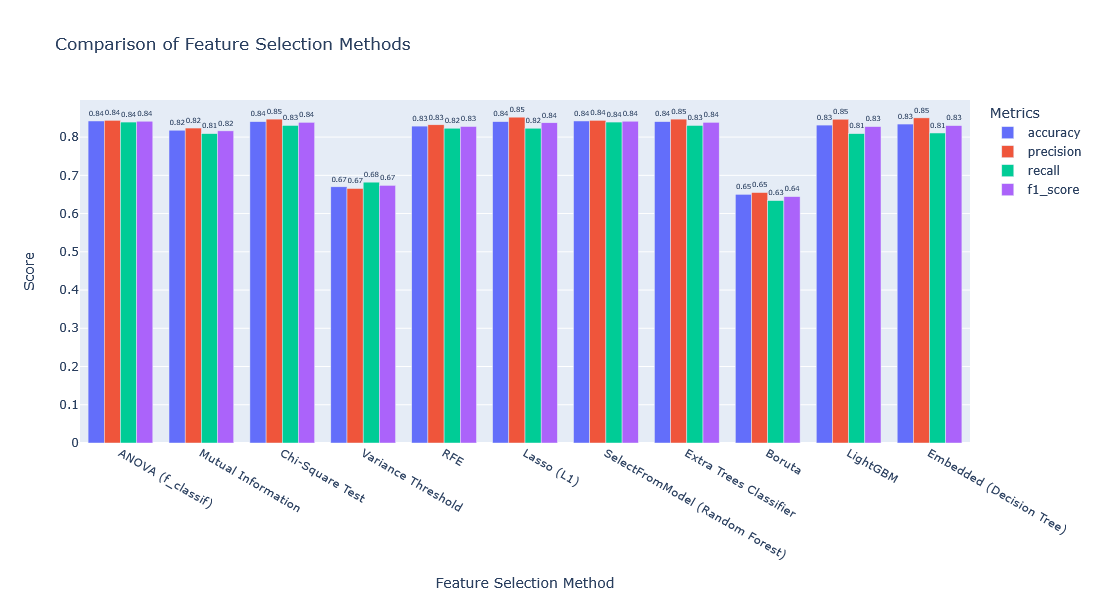

In [46]:
# Visualization of feature selection results using modern graphs
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns={'index': 'Feature Selection Method'})

# Melt the DataFrame to make it suitable for Plotly bar chart
results_melted = results_df.melt(id_vars=['Feature Selection Method'], 
                                 value_vars=metrics,
                                 var_name='Metric', 
                                 value_name='Score')

# Plotly bar chart for comparison with metrics values
fig = px.bar(
    results_melted,
    x='Feature Selection Method',
    y='Score',
    color='Metric',
    barmode='group',
    text='Score',
    title='Comparison of Feature Selection Methods',
    labels={'Score': 'Performance Metric', 'Feature Selection Method': 'Method'},
    height=600
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(legend_title="Metrics", xaxis_title="Feature Selection Method", yaxis_title="Score")
fig.show()
fig.write_image("Images/"+'Comparison of Feature Selection Methods' + ".png", scale=6)

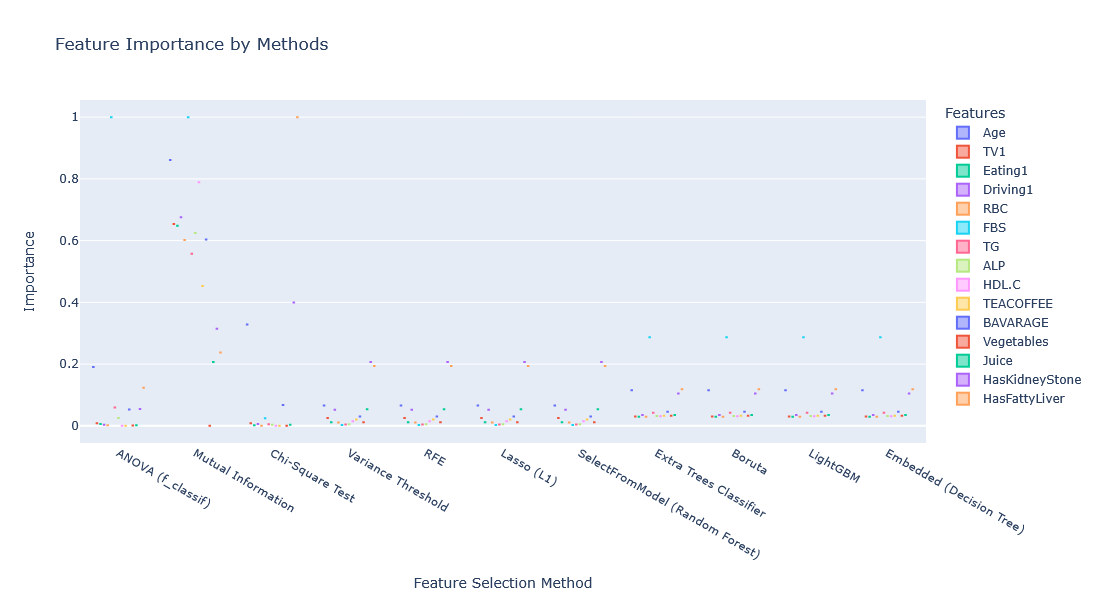

In [34]:
# Improved visualization of feature importance
importance_df = pd.DataFrame(feature_importances).T
importance_df.columns = X_train.columns 
importance_df.columns = importance_df.columns.str.replace(r'num_imputer__','')
importance_df = importance_df.reset_index().rename(columns={'index': 'Feature Selection Method'})
# Melt the DataFrame for better visualization
importance_melted = importance_df.melt(id_vars=['Feature Selection Method'], 
                                       var_name='Feature', 
                                       value_name='Importance')

# Plotly box plot for feature importance comparison
fig_importance = px.box(
    importance_melted,
    x='Feature Selection Method',
    y='Importance',
    color='Feature',
    title='Feature Importance by Methods',
    labels={'Importance': 'Feature Importance', 'Feature Selection Method': 'Method'},
    height=600
)
fig_importance.update_layout(legend_title="Features", xaxis_title="Feature Selection Method", yaxis_title="Importance")
fig_importance.show()


In [35]:
importance_df

,Feature Selection Method,Age,TV1,Eating1,Driving1,RBC,FBS,TG,ALP,HDL.C,TEACOFFEE,BAVARAGE,Vegetables,Juice,HasKidneyStone,HasFattyLiver
0,ANOVA (f_classif),0.191024,0.008795,0.005632,0.003252,0.001896,1.000000,0.059100,0.025172,0.000000,0.000451,0.053082,0.001126,0.001642,0.054364,0.123567
1,Mutual Information,0.860846,0.653979,0.648086,0.675955,0.602178,1.000000,0.557104,0.624848,0.789360,0.452785,0.603316,0.000000,0.207108,0.314703,0.237696
2,Chi-Square Test,0.328281,0.008379,0.001872,0.006141,0.000634,0.024947,0.005133,0.003405,0.000000,0.000360,0.067268,0.000336,0.003671,0.399294,1.000000
3,Variance Threshold,0.065814,0.025324,0.011297,0.052387,0.010825,0.002493,0.004385,0.005067,0.015050,0.020425,0.030075,0.011418,0.053999,0.207053,0.193883
4,RFE,0.065814,0.025324,0.011297,0.052387,0.010825,0.002493,0.004385,0.005067,0.015050,0.020425,0.030075,0.011418,0.053999,0.207053,0.193883
5,Lasso (L1),0.065814,0.025324,0.011297,0.052387,0.010825,0.002493,0.004385,0.005067,0.015050,0.020425,0.030075,0.011418,0.053999,0.207053,0.193883
6,SelectFromModel (Random Forest),0.065814,0.025324,0.011297,0.052387,0.010825,0.002493,0.004385,0.005067,0.015050,0.020425,0.030075,0.011418,0.053999,0.207053,0.193883
7,Extra Trees Classifier,0.114939,0.030176,0.029405,0.034769,0.029656,0.286858,0.042199,0.031926,0.030735,0.032606,0.045400,0.032820,0.034930,0.104952,0.118628
8,Boruta,0.114939,0.030176,0.029405,0.034769,0.029656,0.286858,0.042199,0.031926,0.030735,0.032606,0.045400,0.032820,0.034930,0.104952,0.118628
9,LightGBM,0.114939,0.030176,0.029405,0.034769,0.029656,0.286858,0.042199,0.031926,0.030735,0.032606,0.045400,0.032820,0.034930,0.104952,0.118628


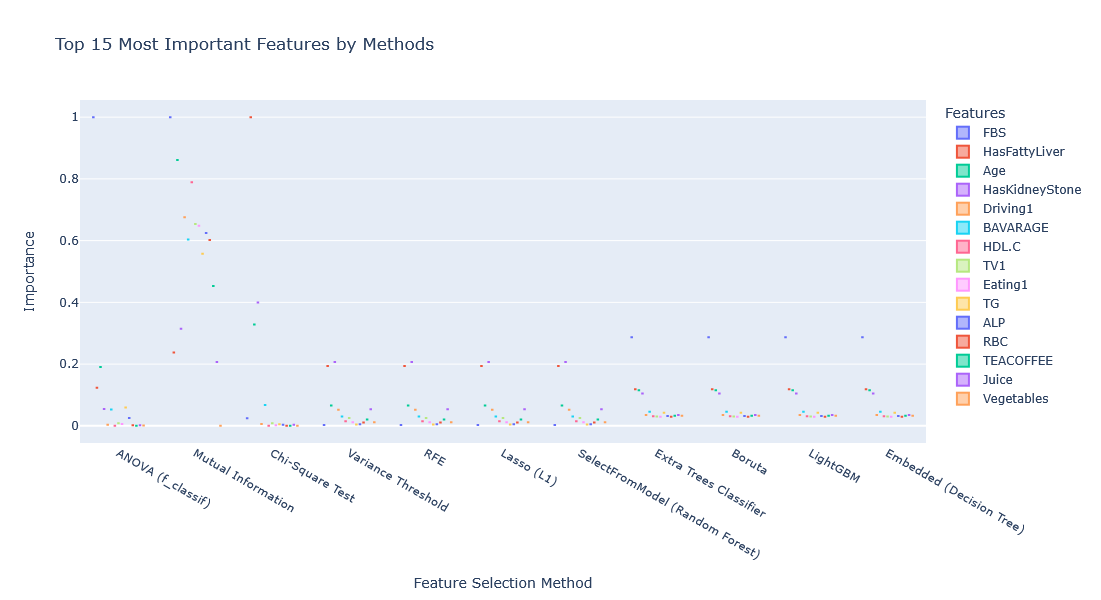

In [36]:
import pandas as pd
import plotly.express as px

# Assuming `X` is your DataFrame with the real feature names (predictors)
# Assuming `feature_importances` is a dictionary where each key is a method, 
# and the value is a pandas Series or DataFrame with feature importance scores.

# Convert the feature importances into a DataFrame for visualization
importance_df = pd.DataFrame(feature_importances).T  # Transpose so that methods are rows
importance_df.columns = X_train.columns  # Use the actual feature names from X
importance_df.columns = importance_df.columns.str.replace(r'num_imputer__','')

importance_df = importance_df.reset_index().rename(columns={'index': 'Feature Selection Method'})

# Determine the most important predictors (e.g., top N important features)
# Let's say we want to select the top 10 most important features across all methods
top_n = 15  # You can change this number to select more or fewer features

# Aggregate feature importance across all methods by averaging importance scores
importance_avg = importance_df.drop('Feature Selection Method', axis=1).mean(axis=0)

# Get the top N most important features
top_features = importance_avg.nlargest(top_n).index

# Filter the original importance DataFrame to include only the top features
importance_top_features_df = importance_df[['Feature Selection Method'] + list(top_features)]

# Melt the DataFrame for better visualization
importance_melted = importance_top_features_df.melt(id_vars=['Feature Selection Method'], 
                                                    var_name='Feature', 
                                                    value_name='Importance')

# Create a box plot using Plotly to compare feature importance across different methods
fig_importance = px.box(
    importance_melted,
    x='Feature Selection Method',
    y='Importance',
    color='Feature',
    title=f'Top {top_n} Most Important Features by Methods',
    labels={'Importance': 'Feature Importance', 'Feature Selection Method': 'Method'},
    height=600
)

# Update plot layout
fig_importance.update_layout(legend_title="Features", 
                             xaxis_title="Feature Selection Method", 
                             yaxis_title="Importance")

# Show the plot
fig_importance.show()
title=str(f'Top {top_n} Most Important Features by Methods0')
fig_importance.write_image(title + ".png", scale=6)

In [37]:
importance_top_features_df
importance_top_features_df.to_excel("Images/"+"output.xlsx")  

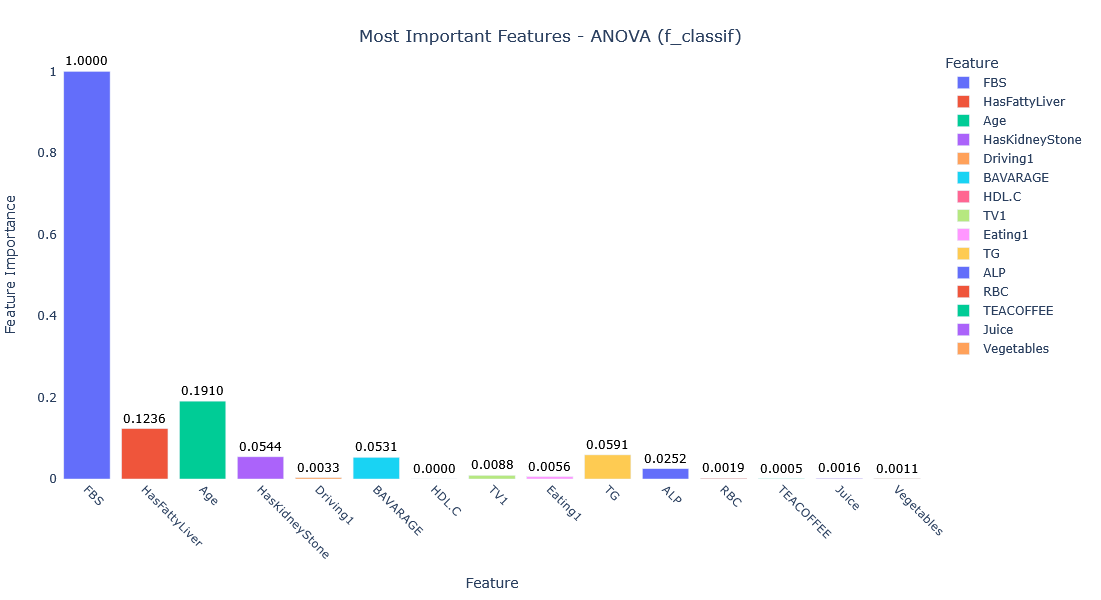

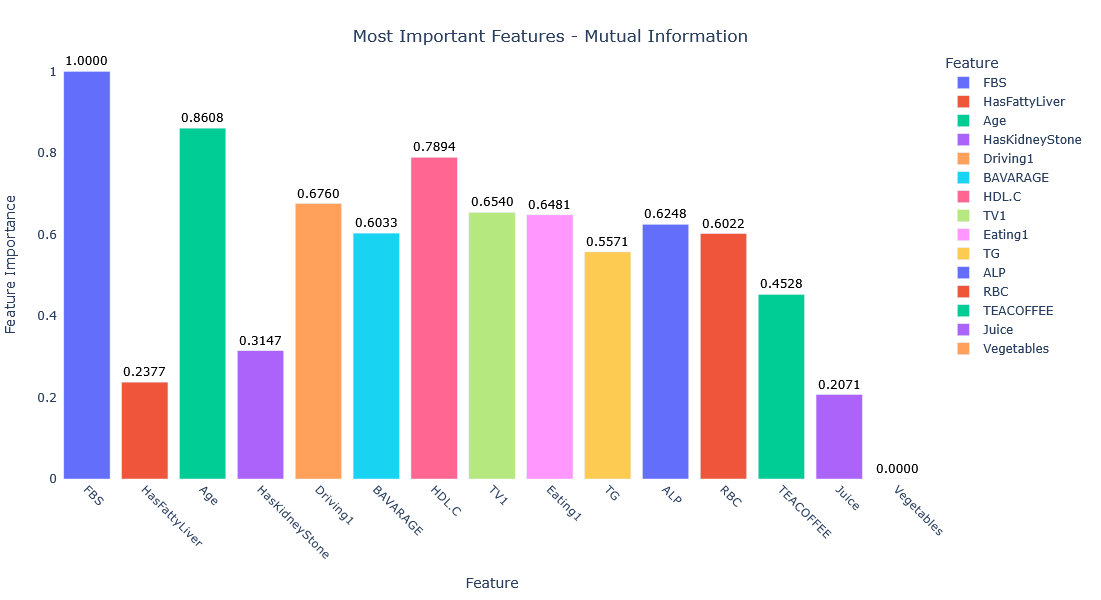

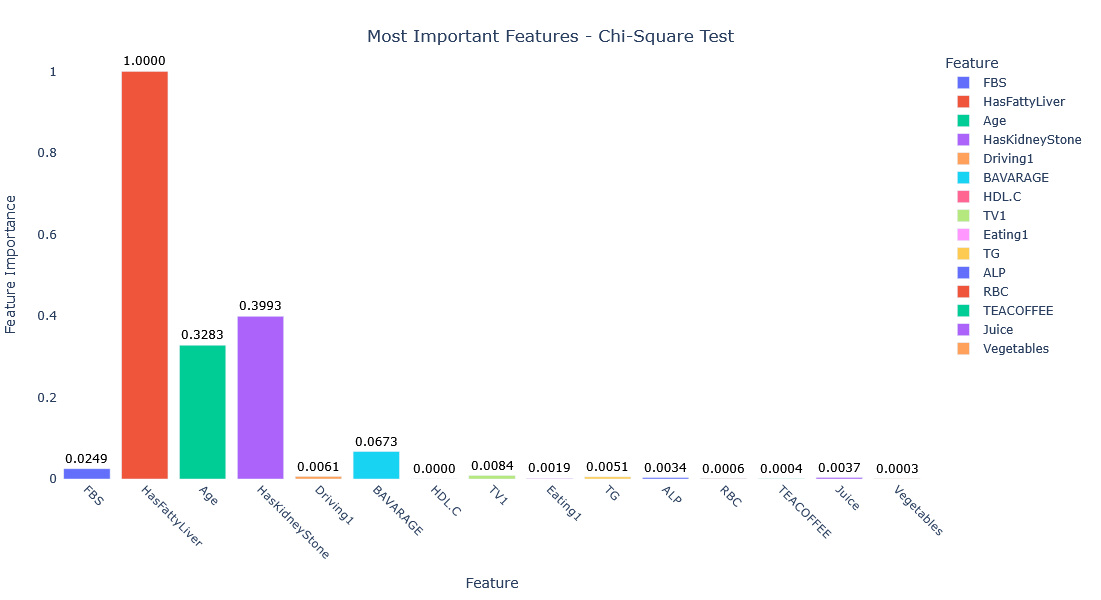

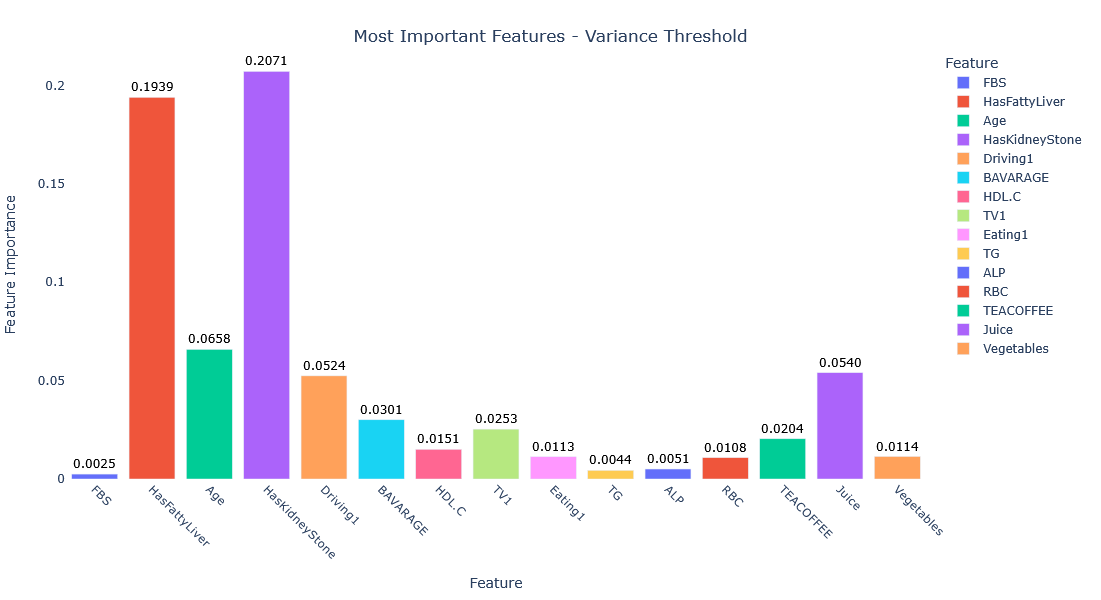

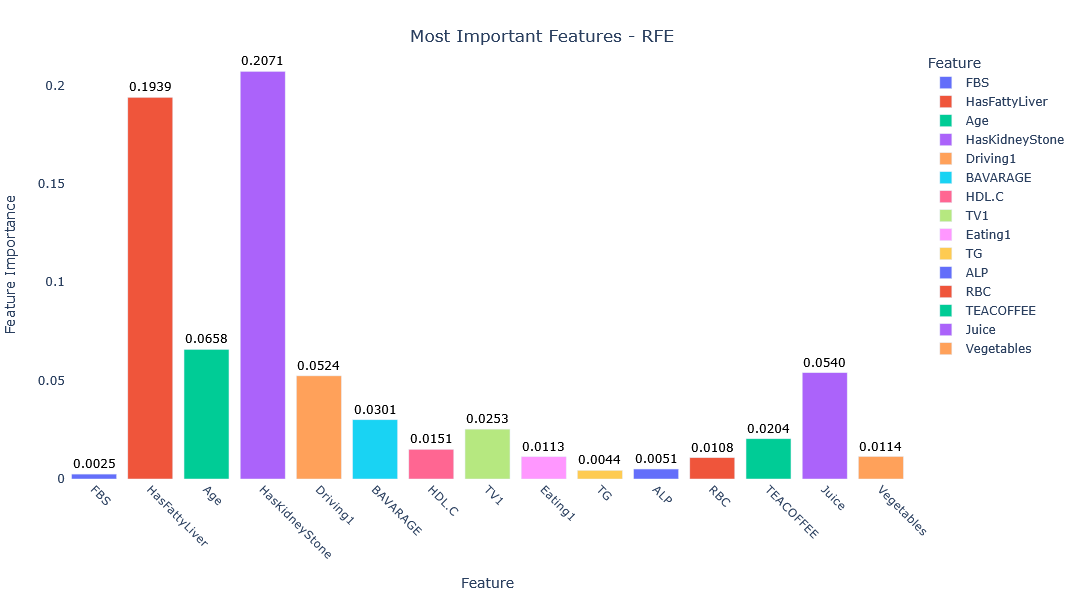

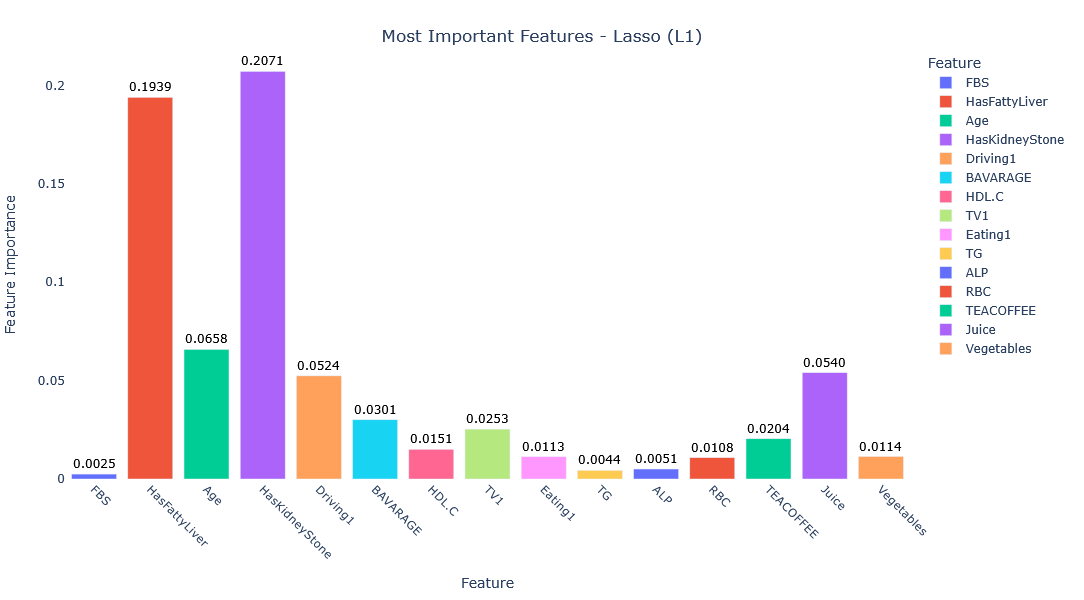

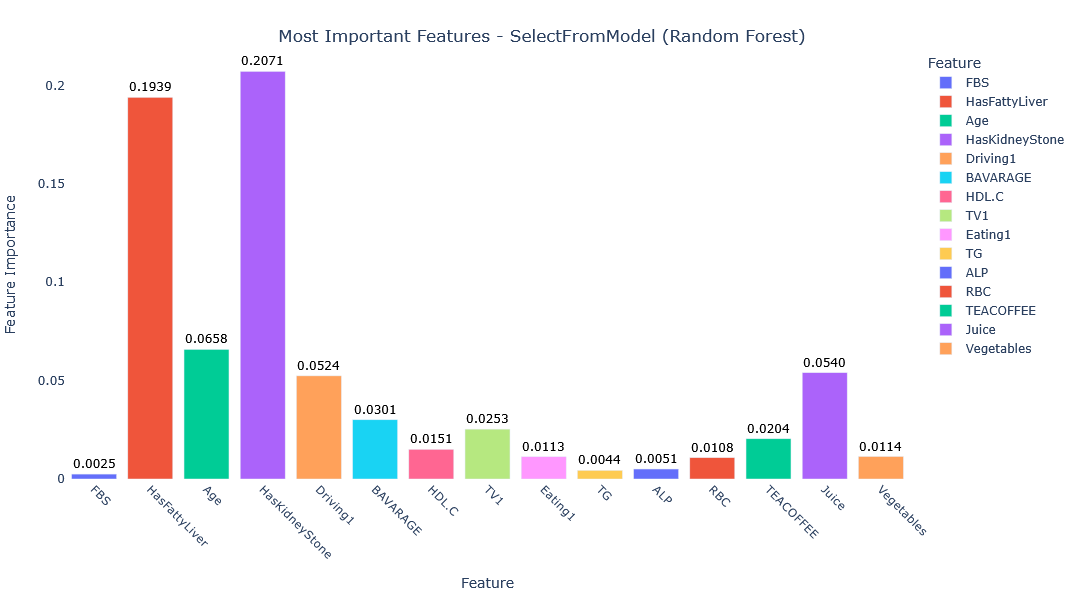

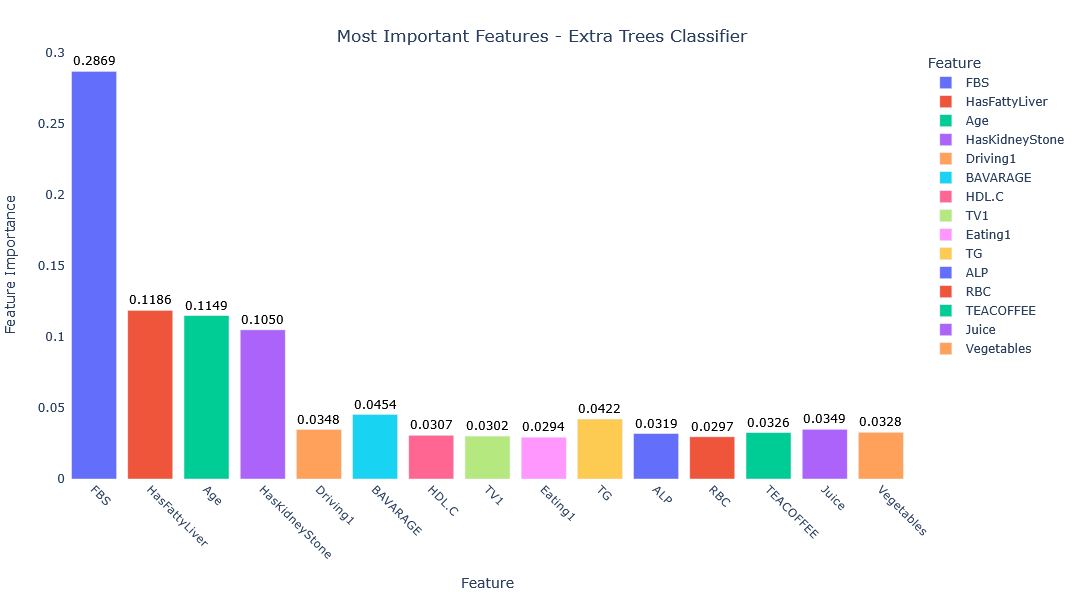

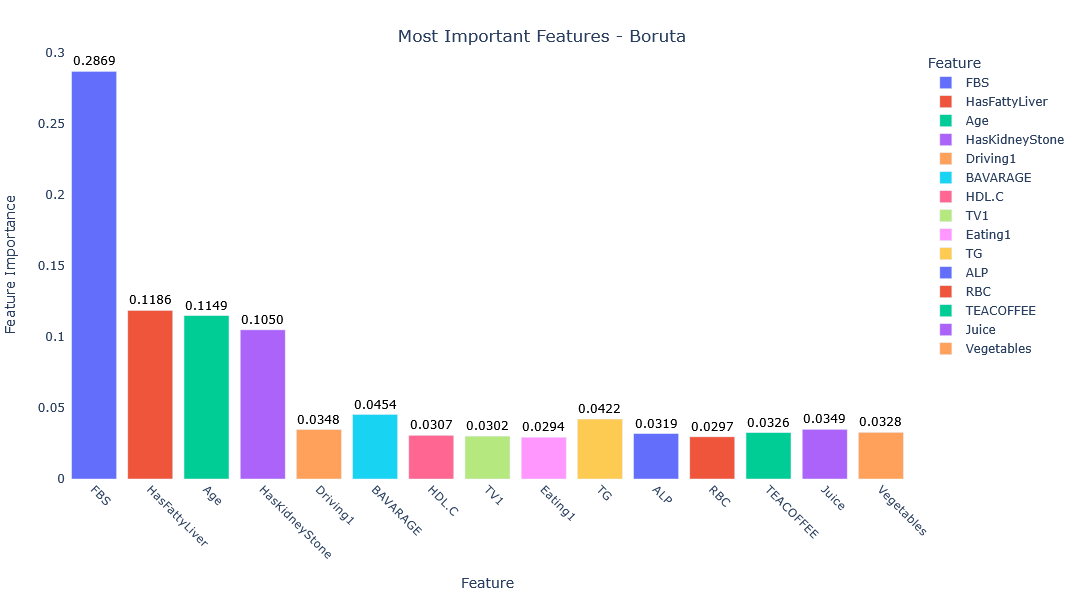

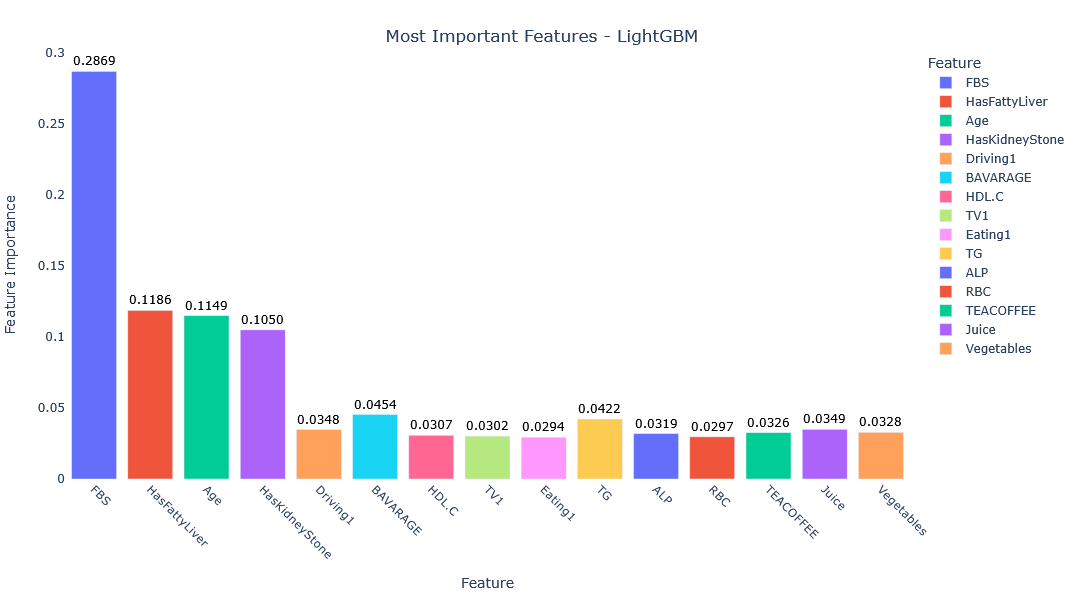

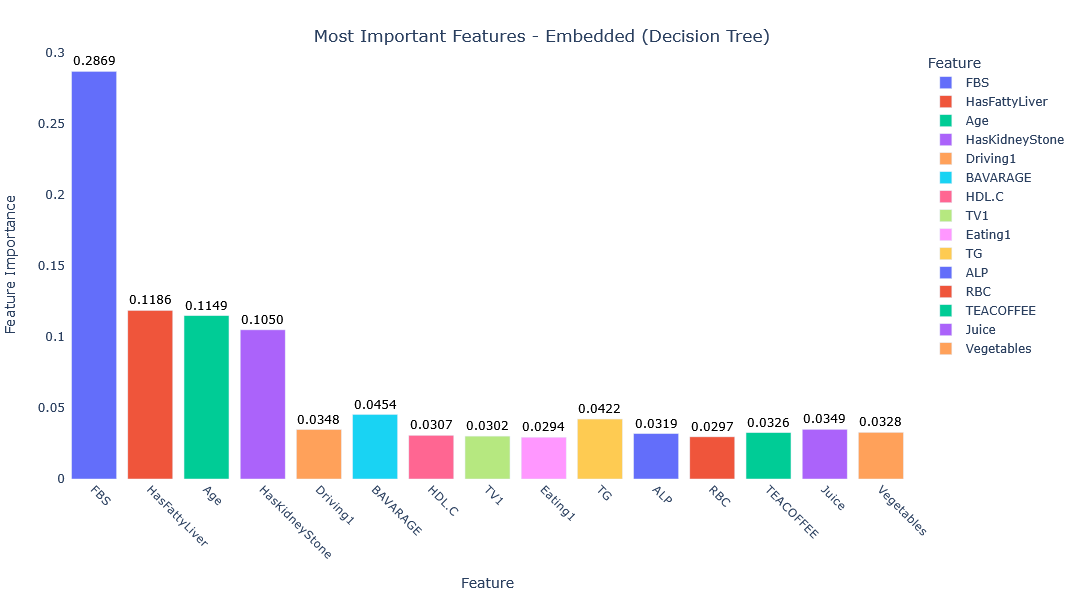

In [38]:
import pandas as pd
import plotly.express as px

# Assuming `X` is your DataFrame with the real feature names (predictors)
# Assuming `feature_importances` is a dictionary where each key is a method, 
# and the value is a pandas Series or DataFrame with feature importance scores.

# Convert the feature importances into a DataFrame for visualization
importance_df = pd.DataFrame(feature_importances).T  # Transpose so that methods are rows
importance_df.columns = X_train.columns  # Use the actual feature names from X
importance_df.columns = importance_df.columns.str.replace(r'num_imputer__','')

importance_df = importance_df.reset_index().rename(columns={'index': 'Feature Selection Method'})

# Determine the most important predictors (e.g., top N important features)
top_n = 15  # You can change this number to select more or fewer features

# Aggregate feature importance across all methods by averaging importance scores
importance_avg = importance_df.drop('Feature Selection Method', axis=1).mean(axis=0)

# Get the top N most important features based on average importance across methods
top_features = importance_avg.nlargest(top_n).index

# Filter the original importance DataFrame to include only the top features
importance_top_features_df = importance_df[['Feature Selection Method'] + list(top_features)]

# Melt the DataFrame for better visualization
importance_melted = importance_top_features_df.melt(id_vars=['Feature Selection Method'], 
                                                    var_name='Feature', 
                                                    value_name='Importance')

# Generate separate charts for each feature selection method
for method in importance_melted['Feature Selection Method'].unique():
    # Filter the data for the current method
    method_data = importance_melted[importance_melted['Feature Selection Method'] == method]

    # Create a bar plot for the current method
    fig_importance = px.bar(
        method_data,
        x='Feature',
        y='Importance',
        color='Feature',
        title=f'Most Important Features - {method}',
        labels={'Importance': 'Feature Importance', 'Feature Selection Method': 'Method'},
        height=600,
        category_orders={'Feature': list(top_features)},  # Ensure top features are sorted
        color_continuous_scale='Viridis',  # Use a gradient color scale for visual effect
    )

    # Add annotations for each bar with the importance value
    for i, row in method_data.iterrows():
        fig_importance.add_annotation(
            x=row['Feature'],
            y=row['Importance'],
            text=f"{row['Importance']:.4f}",  # Format to 4 decimal places
            showarrow=False,
            font=dict(size=12, color='black'),
            align="center",
            yanchor="bottom"  # Corrected from "verticalalignment"
        )

    # Update plot layout for better presentation
    fig_importance.update_layout(
        legend_title="Feature",
        xaxis_title="Feature",
        yaxis_title="Feature Importance",
        xaxis={'tickangle': 45, 'showgrid': False},  # Rotate feature labels for readability
        yaxis={'showgrid': True, 'gridcolor': 'rgba(255, 255, 255, 0.3)'},  # Add gridlines
        plot_bgcolor='rgba(0,0,0,0)',  # Make background transparent
        margin=dict(t=50, b=120, l=50, r=50),  # Adjust margins
        title_x=0.5,  # Center the title
        title_y=0.95,  # Move title to top
    )

    # Show the plot for the current method
    fig_importance.show()
    title=str(f'Most Important Features - {method}')
    fig_importance.write_image("Images/"+title + ".png", scale=6)

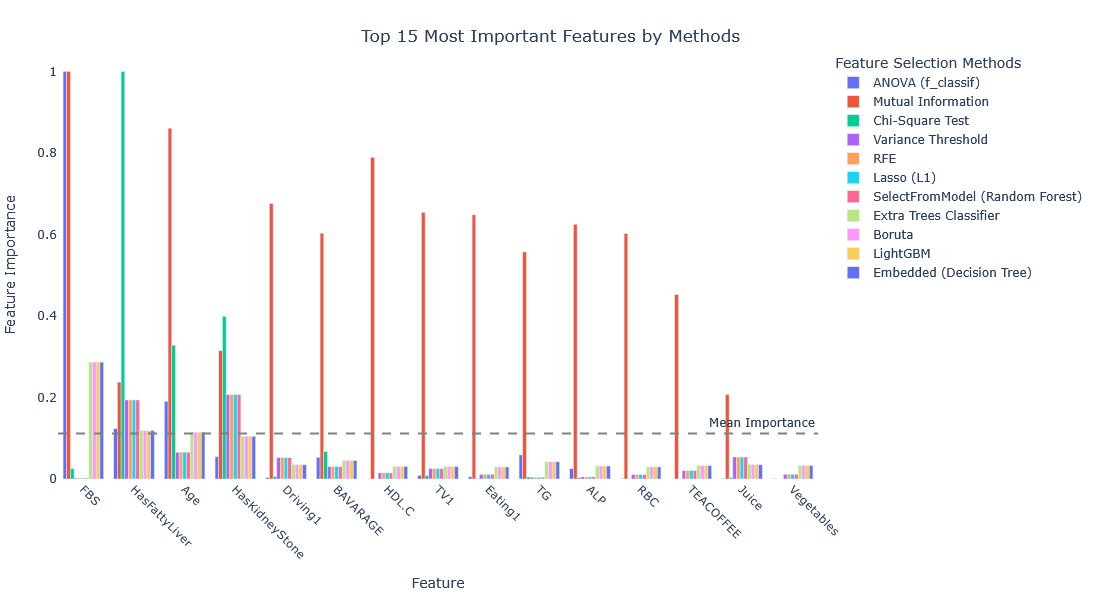

In [39]:
import pandas as pd
import plotly.express as px

# Assuming `X` is your DataFrame with the real feature names (predictors)
# Assuming `feature_importances` is a dictionary where each key is a method, 
# and the value is a pandas Series or DataFrame with feature importance scores.

# Convert the feature importances into a DataFrame for visualization
importance_df = pd.DataFrame(feature_importances).T  # Transpose so that methods are rows
importance_df.columns = X_train.columns  # Use the actual feature names from X
importance_df.columns = importance_df.columns.str.replace(r'num_imputer__','')
importance_df = importance_df.reset_index().rename(columns={'index': 'Feature Selection Method'})

# Determine the most important predictors (e.g., top N important features)
top_n = 15  # You can change this number to select more or fewer features

# Aggregate feature importance across all methods by averaging importance scores
importance_avg = importance_df.drop('Feature Selection Method', axis=1).mean(axis=0)

# Get the top N most important features
top_features = importance_avg.nlargest(top_n).index

# Filter the original importance DataFrame to include only the top features
importance_top_features_df = importance_df[['Feature Selection Method'] + list(top_features)]

# Melt the DataFrame for better visualization
importance_melted = importance_top_features_df.melt(id_vars=['Feature Selection Method'], 
                                                    var_name='Feature', 
                                                    value_name='Importance')

# Create a bar plot using Plotly to compare feature importance across different methods
fig_importance = px.bar(
    importance_melted,
    x='Feature',
    y='Importance',
    color='Feature Selection Method',
    title=f'Top {top_n} Most Important Features by Methods',
    labels={'Importance': 'Feature Importance', 'Feature Selection Method': 'Method'},
    height=600,
    barmode='group',  # Group bars for comparison
    category_orders={'Feature': list(top_features)},  # Ensure top features are sorted
    color_continuous_scale='Viridis',  # Use a gradient color scale for visual effect
)

# Update plot layout for better presentation
fig_importance.update_layout(
    legend_title="Feature Selection Methods", 
    xaxis_title="Feature", 
    yaxis_title="Feature Importance",
    xaxis={'tickangle': 45, 'showgrid': False},  # Rotate feature labels for readability
    yaxis={'showgrid': True, 'gridcolor': 'rgba(255, 255, 255, 0.3)'},  # Add a grid for better readability
    plot_bgcolor='rgba(0,0,0,0)',  # Make background transparent
    margin=dict(t=50, b=120, l=50, r=50),  # Adjust margins to prevent clipping of labels
    title_x=0.5,  # Center the title
    title_y=0.95,  # Move the title to the top
)

# Add horizontal line at mean importance level across all methods for reference
fig_importance.add_hline(
    y=importance_melted['Importance'].mean(), 
    line=dict(color='gray', dash='dash', width=2), 
    annotation_text='Mean Importance', 
    annotation_position='top right', 
    annotation_font_size=12
)

# Show the plot
fig_importance.show()
title=str(f"Top {top_n} Most Important Features by Methods1")
fig_importance.write_image("Images/"+title + ".png", scale=6)

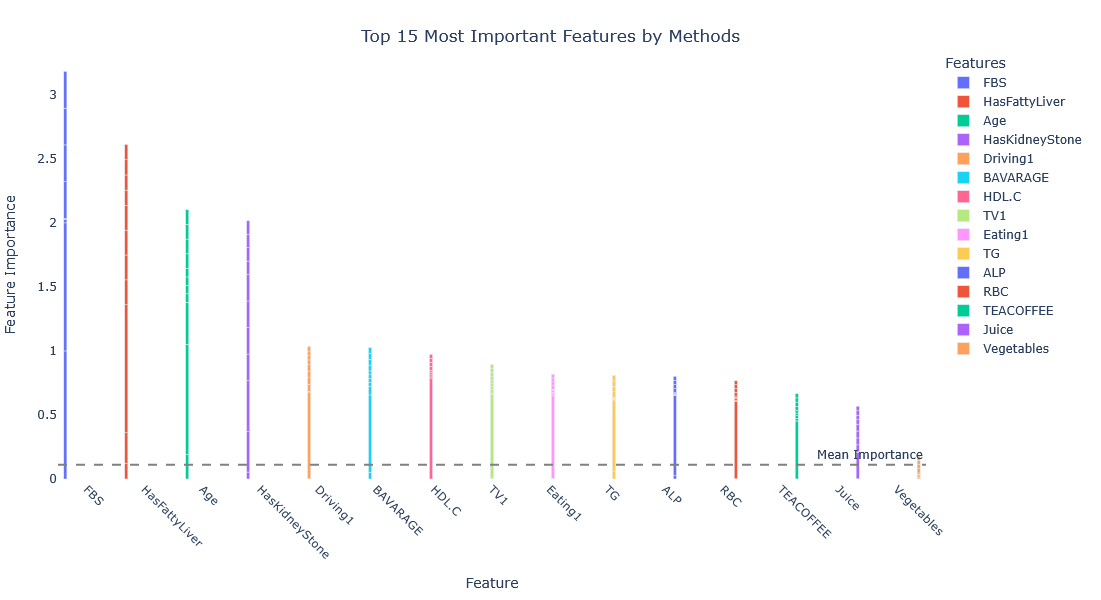

In [40]:
import pandas as pd
import plotly.express as px

# Assuming `X` is your DataFrame with the real feature names (predictors)
# Assuming `feature_importances` is a dictionary where each key is a method, 
# and the value is a pandas Series or DataFrame with feature importance scores.

# Convert the feature importances into a DataFrame for visualization
importance_df = pd.DataFrame(feature_importances).T  # Transpose so that methods are rows
importance_df.columns = X_train.columns  # Use the actual feature names from X
importance_df.columns = importance_df.columns.str.replace(r'num_imputer__','')

importance_df = importance_df.reset_index().rename(columns={'index': 'Feature Selection Method'})

# Determine the most important predictors (e.g., top N important features)
top_n = 15  # You can change this number to select more or fewer features

# Aggregate feature importance across all methods by averaging importance scores
importance_avg = importance_df.drop('Feature Selection Method', axis=1).mean(axis=0)

# Get the top N most important features
top_features = importance_avg.nlargest(top_n).index

# Filter the original importance DataFrame to include only the top features
importance_top_features_df = importance_df[['Feature Selection Method'] + list(top_features)]

# Melt the DataFrame for better visualization
importance_melted = importance_top_features_df.melt(id_vars=['Feature Selection Method'], 
                                                    var_name='Feature', 
                                                    value_name='Importance')

# Create a bar plot using Plotly to compare feature importance across different methods
fig_importance = px.bar(
    importance_melted,
    x='Feature',
    y='Importance',
    color='Feature',  # Color bars by Feature to match the legend
    title=f'Top {top_n} Most Important Features by Methods',
    labels={'Importance': 'Feature Importance', 'Feature Selection Method': 'Method'},
    height=600,
    barmode='group',  # Group bars for comparison
    category_orders={'Feature': list(top_features)},  # Ensure top features are sorted
)

# Update plot layout for better presentation
fig_importance.update_layout(
    legend_title="Features",  # Legend title to "Features"
    xaxis_title="Feature", 
    yaxis_title="Feature Importance",
    xaxis={'tickangle': 45, 'showgrid': False},  # Rotate feature labels for readability
    yaxis={'showgrid': True, 'gridcolor': 'rgba(255, 255, 255, 0.3)'},  # Add a grid for better readability
    plot_bgcolor='rgba(0,0,0,0)',  # Make background transparent
    margin=dict(t=50, b=120, l=50, r=50),  # Adjust margins to prevent clipping of labels
    title_x=0.5,  # Center the title
    title_y=0.95,  # Move the title to the top
)

# Add horizontal line at mean importance level across all methods for reference
fig_importance.add_hline(
    y=importance_melted['Importance'].mean(), 
    line=dict(color='gray', dash='dash', width=2), 
    annotation_text='Mean Importance', 
    annotation_position='top right', 
    annotation_font_size=12
)

# Show the plot
fig_importance.show()
title=str(f"Top {top_n} Most Important Features by Methods2")
fig_importance.write_image("Images/"+title + ".png", scale=6)

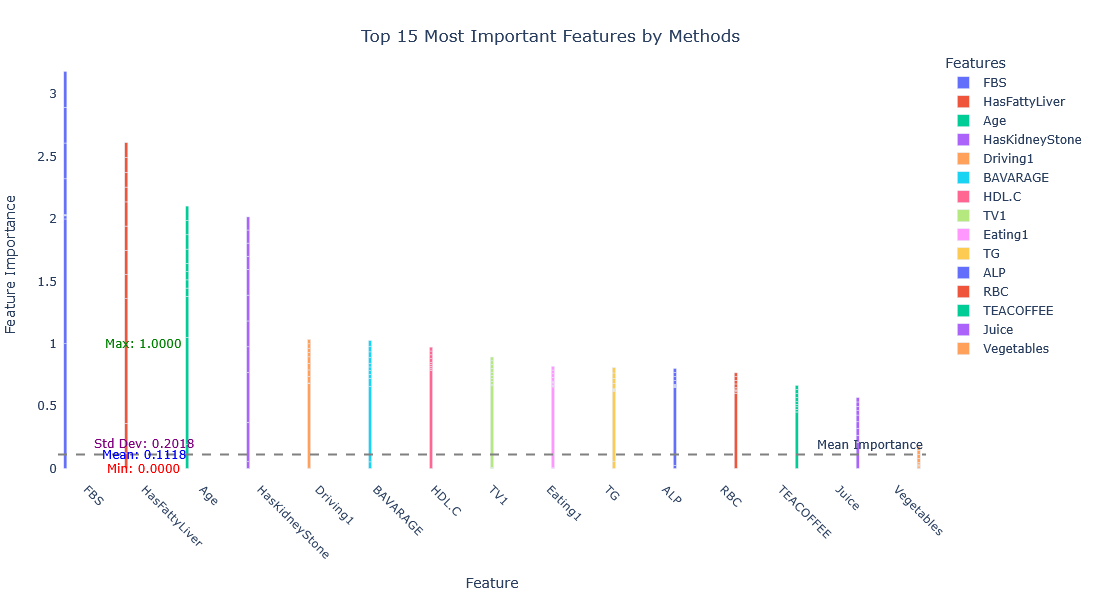

In [41]:
import pandas as pd
import plotly.express as px

# Assuming `X` is your DataFrame with the real feature names (predictors)
# Assuming `feature_importances` is a dictionary where each key is a method, 
# and the value is a pandas Series or DataFrame with feature importance scores.

# Convert the feature importances into a DataFrame for visualization
importance_df = pd.DataFrame(feature_importances).T  # Transpose so that methods are rows
importance_df.columns = X_train.columns  # Use the actual feature names from X
importance_df.columns = importance_df.columns.str.replace(r'num_imputer__','')
importance_df = importance_df.reset_index().rename(columns={'index': 'Feature Selection Method'})

# Determine the most important predictors (e.g., top N important features)
top_n = 15  # You can change this number to select more or fewer features

# Aggregate feature importance across all methods by averaging importance scores
importance_avg = importance_df.drop('Feature Selection Method', axis=1).mean(axis=0)

# Get the top N most important features
top_features = importance_avg.nlargest(top_n).index

# Filter the original importance DataFrame to include only the top features
importance_top_features_df = importance_df[['Feature Selection Method'] + list(top_features)]

# Melt the DataFrame for better visualization
importance_melted = importance_top_features_df.melt(id_vars=['Feature Selection Method'], 
                                                    var_name='Feature', 
                                                    value_name='Importance')

# Create a bar plot using Plotly to compare feature importance across different methods
fig_importance = px.bar(
    importance_melted,
    x='Feature',
    y='Importance',
    color='Feature',  # Color bars by Feature for clarity
    title=f'Top {top_n} Most Important Features by Methods',
    labels={'Importance': 'Feature Importance', 'Feature Selection Method': 'Method'},
    height=600,
    barmode='group',  # Group bars for comparison
    category_orders={'Feature': list(top_features)},  # Ensure top features are sorted
    color_discrete_sequence=px.colors.qualitative.Plotly,  # Distinct colors for better clarity
    hover_data={'Importance': True, 'Feature': True},  # Add hover data for importance values
)

# Update plot layout for better presentation
fig_importance.update_layout(
    legend_title="Features",  # Legend title to "Features"
    xaxis_title="Feature", 
    yaxis_title="Feature Importance",
    xaxis={'tickangle': 45, 'showgrid': False},  # Rotate feature labels for readability
    yaxis={'showgrid': True, 'gridcolor': 'rgba(255, 255, 255, 0.3)'},  # Add a grid for better readability
    plot_bgcolor='rgba(0,0,0,0)',  # Make background transparent
    margin=dict(t=50, b=120, l=50, r=50),  # Adjust margins to prevent clipping of labels
    title_x=0.5,  # Center the title
    title_y=0.95,  # Move the title to the top
)

# Add horizontal line at mean importance level across all methods for reference
fig_importance.add_hline(
    y=importance_melted['Importance'].mean(), 
    line=dict(color='gray', dash='dash', width=2), 
    annotation_text='Mean Importance', 
    annotation_position='top right', 
    annotation_font_size=12
)

# Additional statistics: Add annotations for max, min, and standard deviation
mean_importance = importance_melted['Importance'].mean()
max_importance = importance_melted['Importance'].max()
min_importance = importance_melted['Importance'].min()
std_importance = importance_melted['Importance'].std()

# Annotate mean, max, min, and std on the plot
fig_importance.add_annotation(
    x=0.98, 
    y=mean_importance, 
    text=f"Mean: {mean_importance:.4f}",
    showarrow=False, 
    font=dict(size=12, color='blue'),
    align="right"
)

fig_importance.add_annotation(
    x=0.98, 
    y=max_importance, 
    text=f"Max: {max_importance:.4f}",
    showarrow=False, 
    font=dict(size=12, color='green'),
    align="right"
)

fig_importance.add_annotation(
    x=0.98, 
    y=min_importance, 
    text=f"Min: {min_importance:.4f}",
    showarrow=False, 
    font=dict(size=12, color='red'),
    align="right"
)

fig_importance.add_annotation(
    x=0.98, 
    y=std_importance, 
    text=f"Std Dev: {std_importance:.4f}",
    showarrow=False, 
    font=dict(size=12, color='purple'),
    align="right"
)

# Show the plot
fig_importance.show()
title=str(f"Top {top_n} Most Important Features by MethodsWithMSTD")
fig_importance.write_image("Images/"+title + ".png", scale=6)


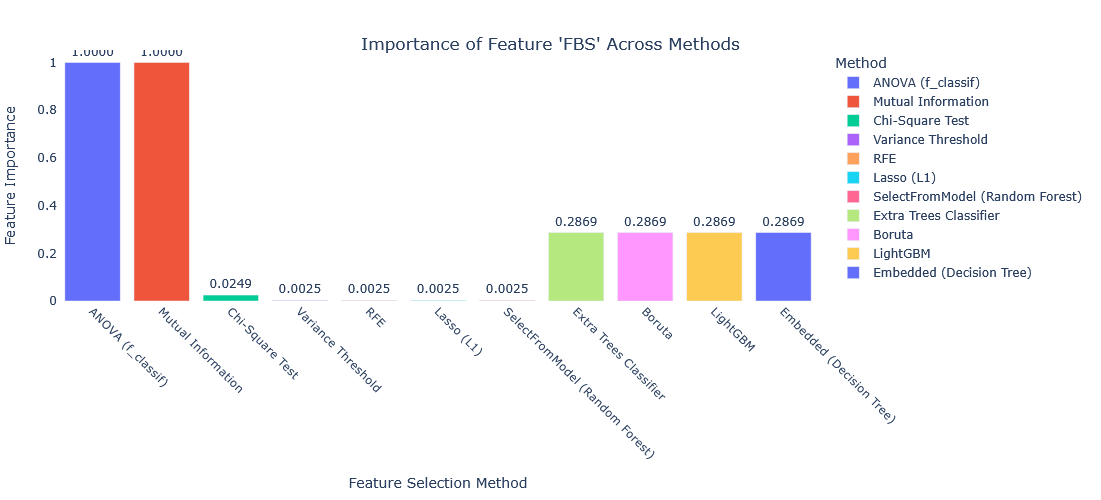

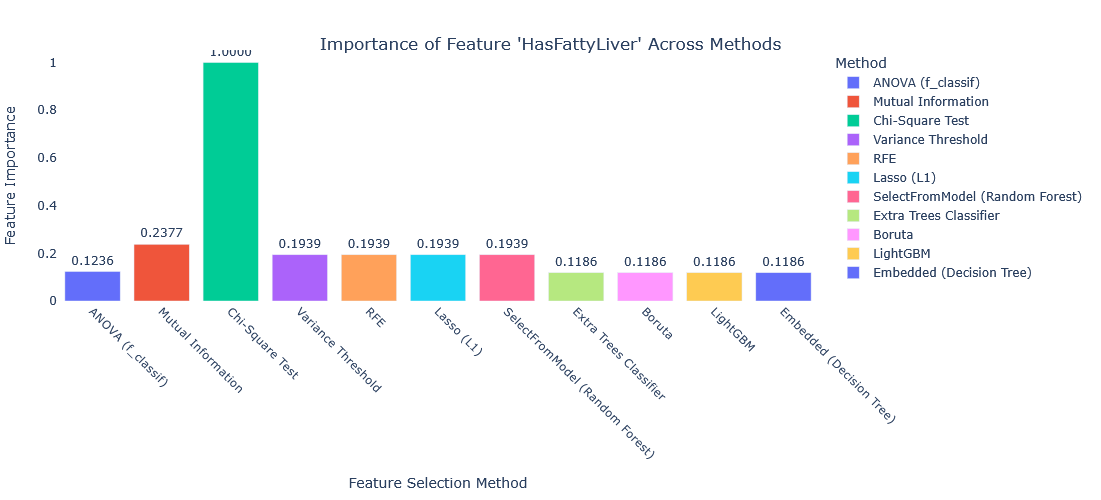

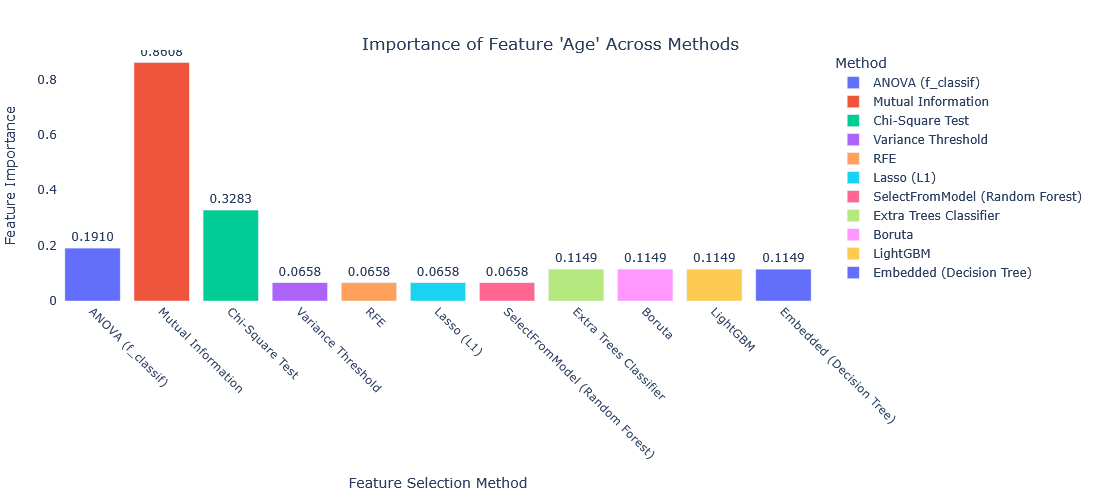

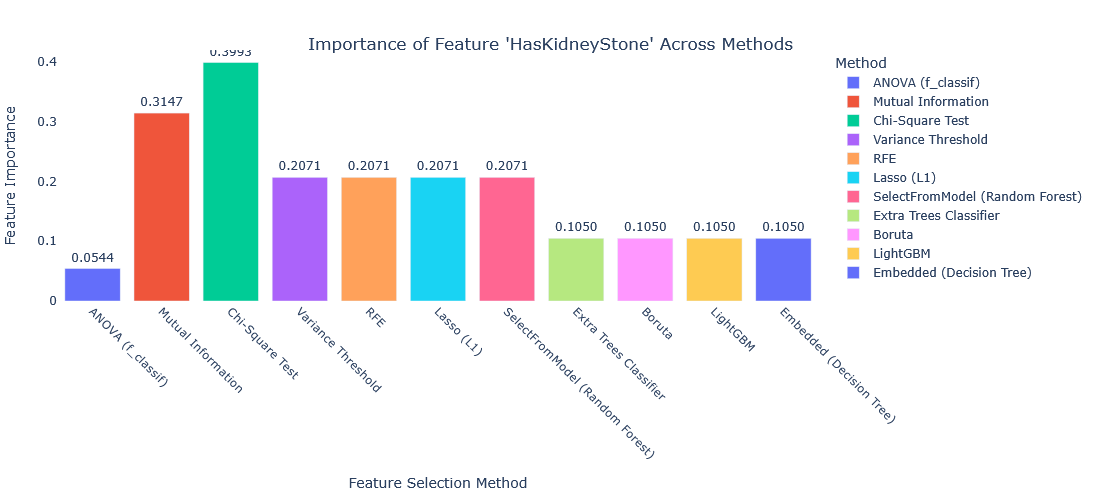

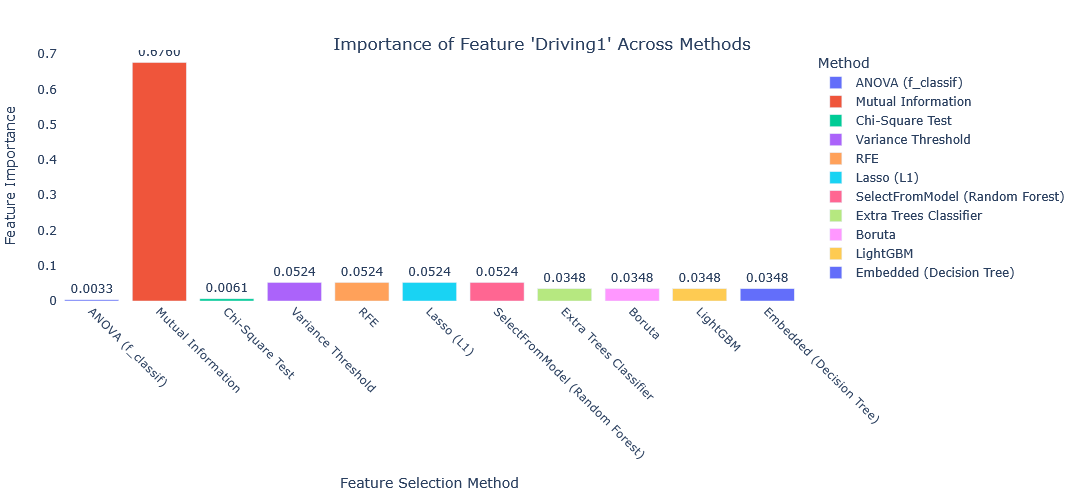

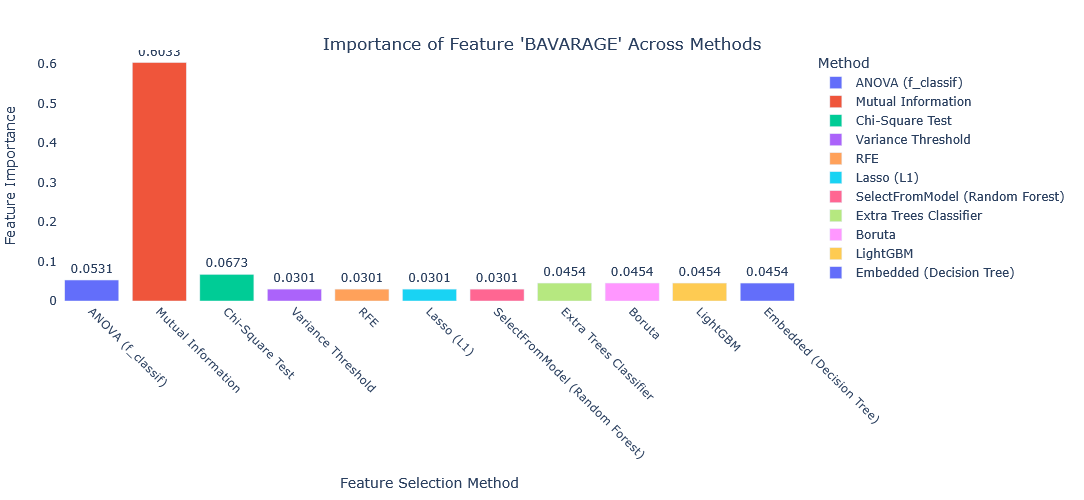

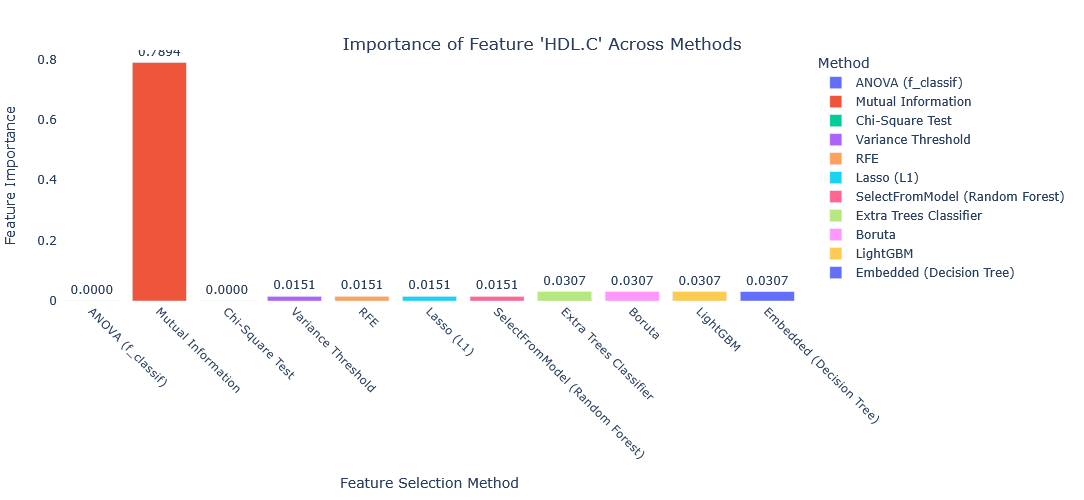

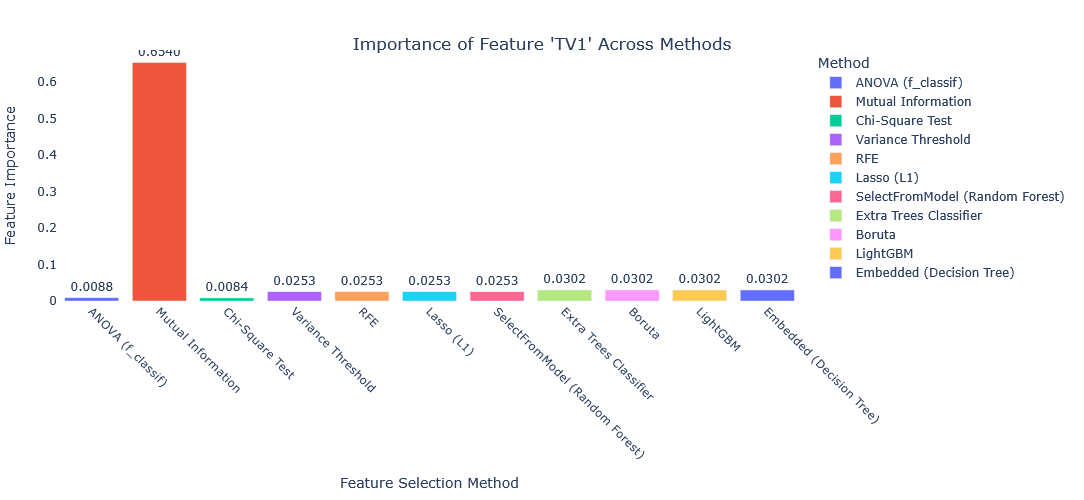

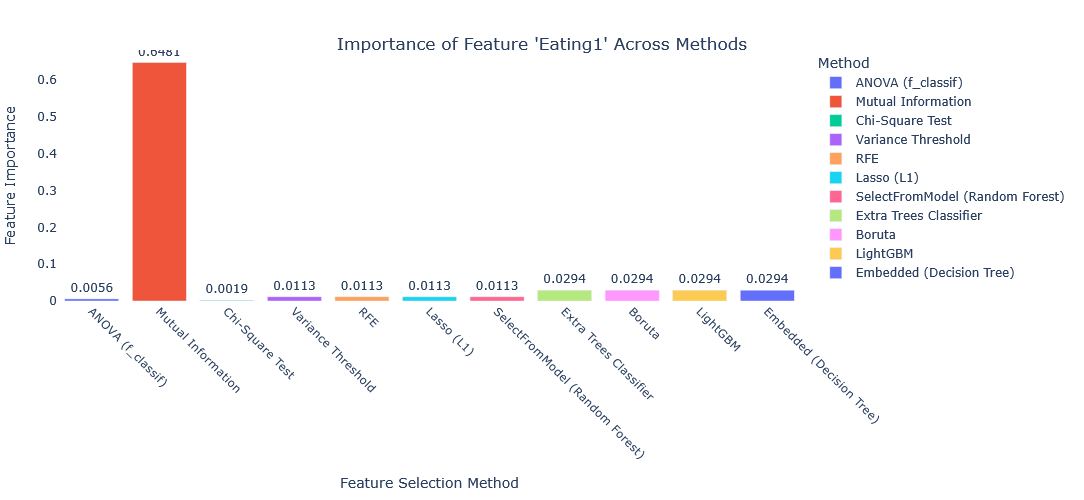

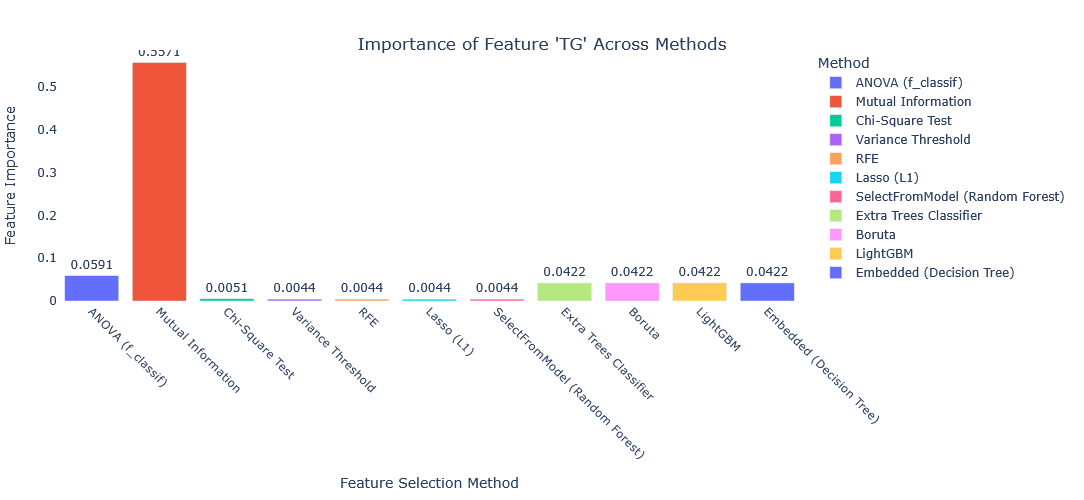

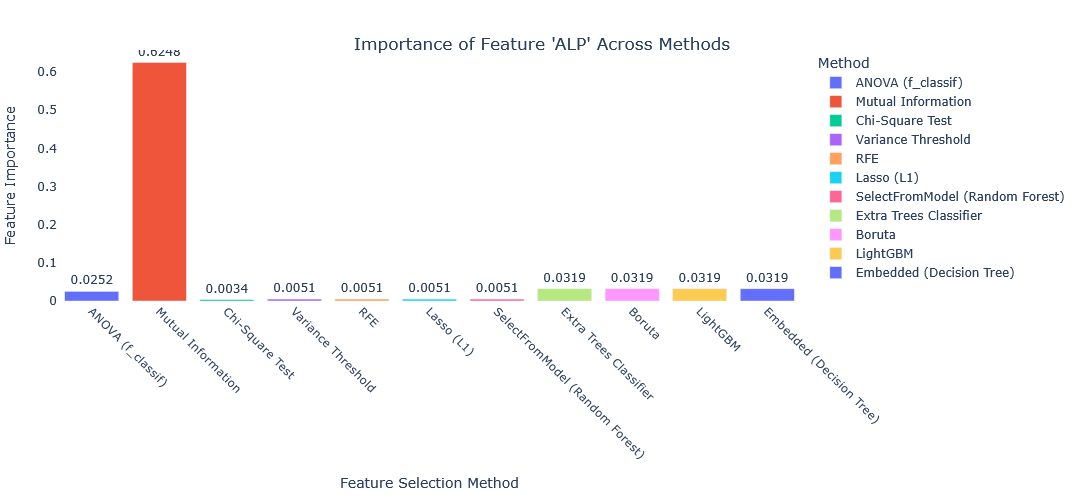

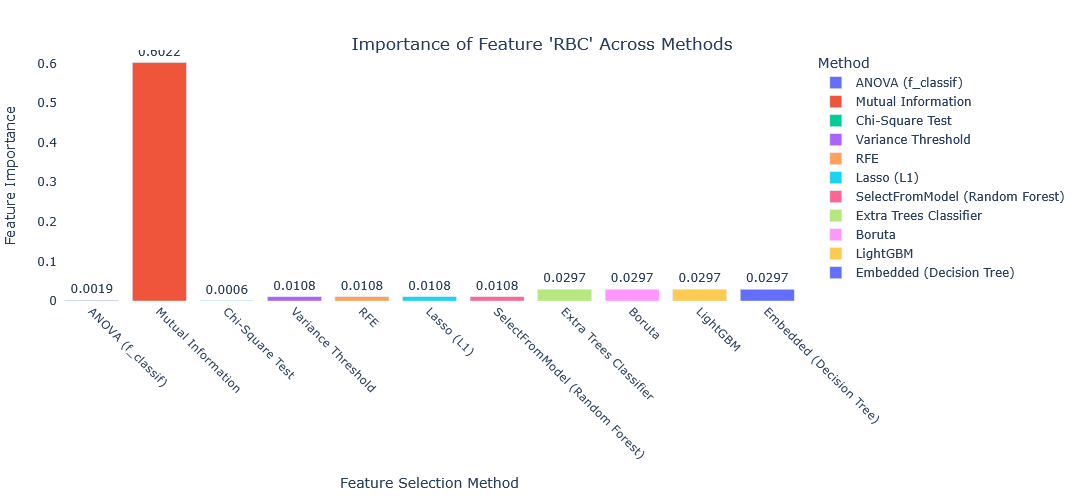

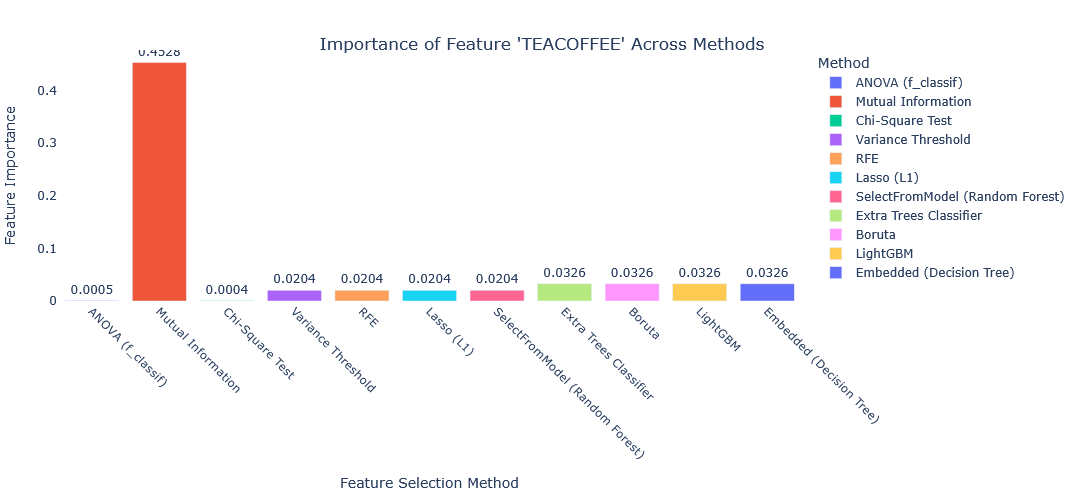

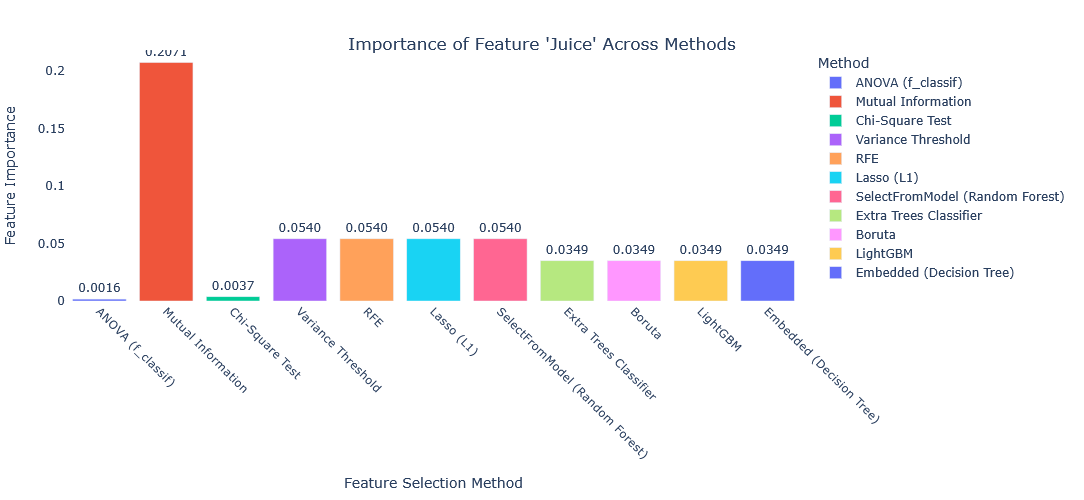

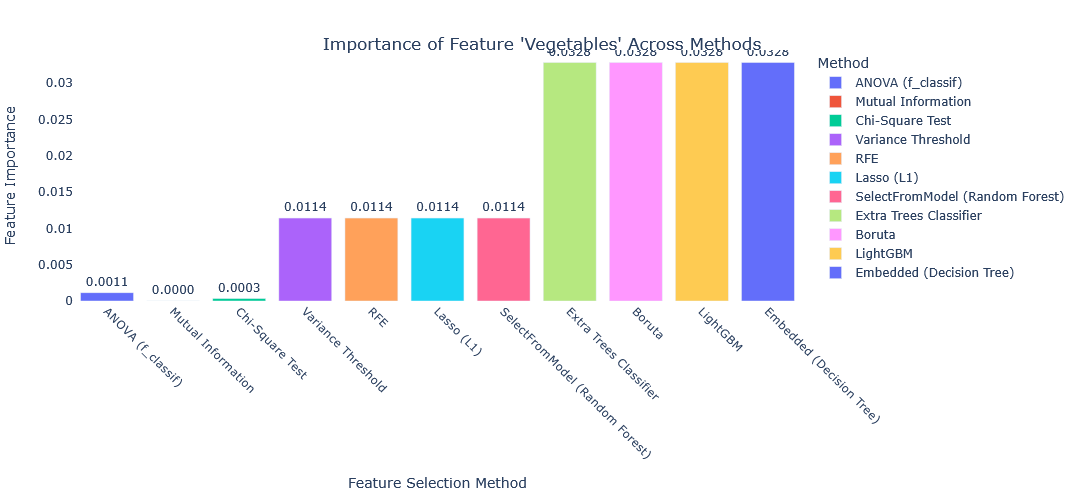

In [43]:
import pandas as pd
import plotly.express as px

# Assuming `X` is your DataFrame with feature names (predictors)
# Assuming `feature_importances` is a dictionary where each key is a method name,
# and the value is a pandas Series or array with feature importance scores.

# Convert the feature importances into a DataFrame for visualization
importance_df = pd.DataFrame(feature_importances).T  # Transpose so methods are rows
importance_df.columns = X_train.columns  # Use actual feature names
importance_df.columns = importance_df.columns.str.replace(r'num_imputer__','')

importance_df = importance_df.reset_index().rename(columns={'index': 'Feature Selection Method'})

# Determine the most important predictors (top 15 important features)
top_n = 15  # Define the number of top features

# Aggregate feature importance across all methods by averaging importance scores
importance_avg = importance_df.drop('Feature Selection Method', axis=1).mean(axis=0)

# Get the top 15 most important features
top_features = importance_avg.nlargest(top_n).index

# Filter the original importance DataFrame to include only the top features
importance_top_features_df = importance_df[['Feature Selection Method'] + list(top_features)]

# Melt the DataFrame for better visualization (long format)
importance_melted = importance_top_features_df.melt(
    id_vars=['Feature Selection Method'],
    var_name='Feature',
    value_name='Importance'
)

# Generate a separate graph for each of the top 15 features
for feature in top_features:
    # Filter data for the specific feature
    feature_data = importance_melted[importance_melted['Feature'] == feature]
    
    # Create a bar plot for the feature across different methods
    fig = px.bar(
        feature_data,
        x='Feature Selection Method',
        y='Importance',
        title=f"Importance of Feature '{feature}' Across Methods<br><br><br><br>",
        labels={'Importance': 'Feature Importance', 'Feature Selection Method': 'Method'},
        color='Feature Selection Method',  # Different colors for each method
        text='Importance',  # Display importance values on the bars
        height=500
    )
    
    # Update plot layout for better readability
    fig.update_layout(
        xaxis_title="Feature Selection Method",
        yaxis_title="Feature Importance",
        xaxis_tickangle=45,
        title_x=0.5,  # Center the title
        title_y=0.9,  # Adjust title position
        margin=dict(t=50, b=120, l=50, r=50),  # Adjust margins for labels
        plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    )
    
    # Update bar trace for clarity
    fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
    
    # Show the plot
    fig.show()
    title=str(f"Importance of Feature '{feature}' Across Methods",)
    fig.write_image("Images/"+title + ".png", scale=6)